In [1]:
# coding: utf-8
from tkinter import filedialog
import os
import re
# ファイル指定
# typ = [('CSVファイル','*.csv')] 
typ = [(' ','*')] 
# dir = 'C:\\'
dir = 'C:\\Users\\17T2166H\\OneDrive\\信州大学\\四年\\研究'
fle = filedialog.askopenfilename(filetypes = typ, initialdir = dir) 
csv_name = fle
print("読み込みファイル:",fle)
実験number =re.findall(r"\d+", os.path.splitext(os.path.basename(fle))[0])[0]
# csv_name ="YYNo"+実験number+"_4pd.csv"

読み込みファイル: C:/Users/17T2166H/OneDrive/信州大学/四年/研究/実験/20210709_第7回/X線回折による配向解析/original/YYNo007.dat


In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# 日本語出力対応
plt.rcParams['font.family'] = 'IPAexGothic'

In [7]:
#CSVファイルをUTF-8形式で読み込む
df_score = pd.read_csv(csv_name,encoding = 'UTF8', engine='python', names=("2sita", "cps"), sep="   ")
#dataを出力
df_score[0:10]



,2sita,cps
0,40.00,3
1,40.02,11
2,40.04,5
3,40.06,6
4,40.08,7
5,40.10,5
6,40.12,13
7,40.14,7
8,40.16,7
9,40.18,2


In [8]:
# 移動平均を作成
average_num=5
df_score["cps移動平均"]=df_score["cps"].rolling(average_num).mean().round(1)
# df_score[0:10]

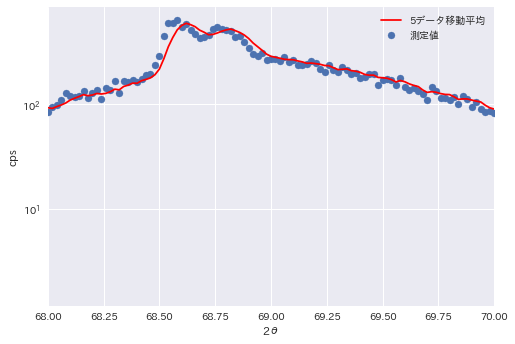

In [9]:
# 表示データ抜き出し
x=df_score["2sita"]
y=df_score["cps"]
y_rolling=df_score["cps移動平均"]

# グラフの作成、表示、保存（PDF）
# fig = plt.figure()
# ax = fig.add_subplot(111) 
plt.scatter(x, y, label="測定値")
plt.plot(x, y_rolling,color="r", label=str(average_num)+"データ移動平均")
# plt.set_title("YYNo"+実験number)
plt.xlabel("2θ")
plt.ylabel("cps")
plt.legend()
# 個別調整
plt.yscale('log')
# plt.yscale('linear')
# plt.xlim(40,50)
plt.xlim(68,70)
# plt.ylim(0,60)
# plt.ylim(0,30)
plt.show()

In [118]:
plt.close()

In [115]:
show_point=69
show_nom=int((show_point-40)/0.02)
df_score[show_nom-25:show_nom+25]

,2sita,cps,cps移動平均
1425,68.4998,790,427.5
1426,68.5198,1136,515.7
1427,68.5398,1643,650.4
1428,68.5598,2192,837.0
1429,68.5798,2768,1079.1
1430,68.5998,3104,1355.1
1431,68.6198,3258,1643.3
1432,68.6398,3458,1946.6
1433,68.6598,3291,2224.7
1434,68.6798,3341,2498.1
